In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn as ml
import seaborn as sns
from scipy.io import arff
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
phi = pd.read_csv('/content/drive/MyDrive/phish/Training.csv')
phi['Result'] = phi['Result'].replace(-1,0)

In [ ]:
phi.drop(columns=['id','double_slash_redirecting','port','on_mouseover','RightClick','popUpWidnow','Iframe','DNSRecord','Google_Index'], inplace=True)
phi.reset_index(drop=True, inplace=True)
phi.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,web_traffic,Page_Rank,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,0,-1,-1,-1,1,-1,0
1,1,1,1,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,0,-1,0,-1,1,1,0
2,1,0,1,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,-1,0,1,1,-1,0,-1,0
3,1,0,1,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,0,-1,1,-1,-1,1,0
4,1,0,-1,1,-1,1,1,-1,1,1,1,0,0,-1,1,1,0,-1,0,-1,1,1,1


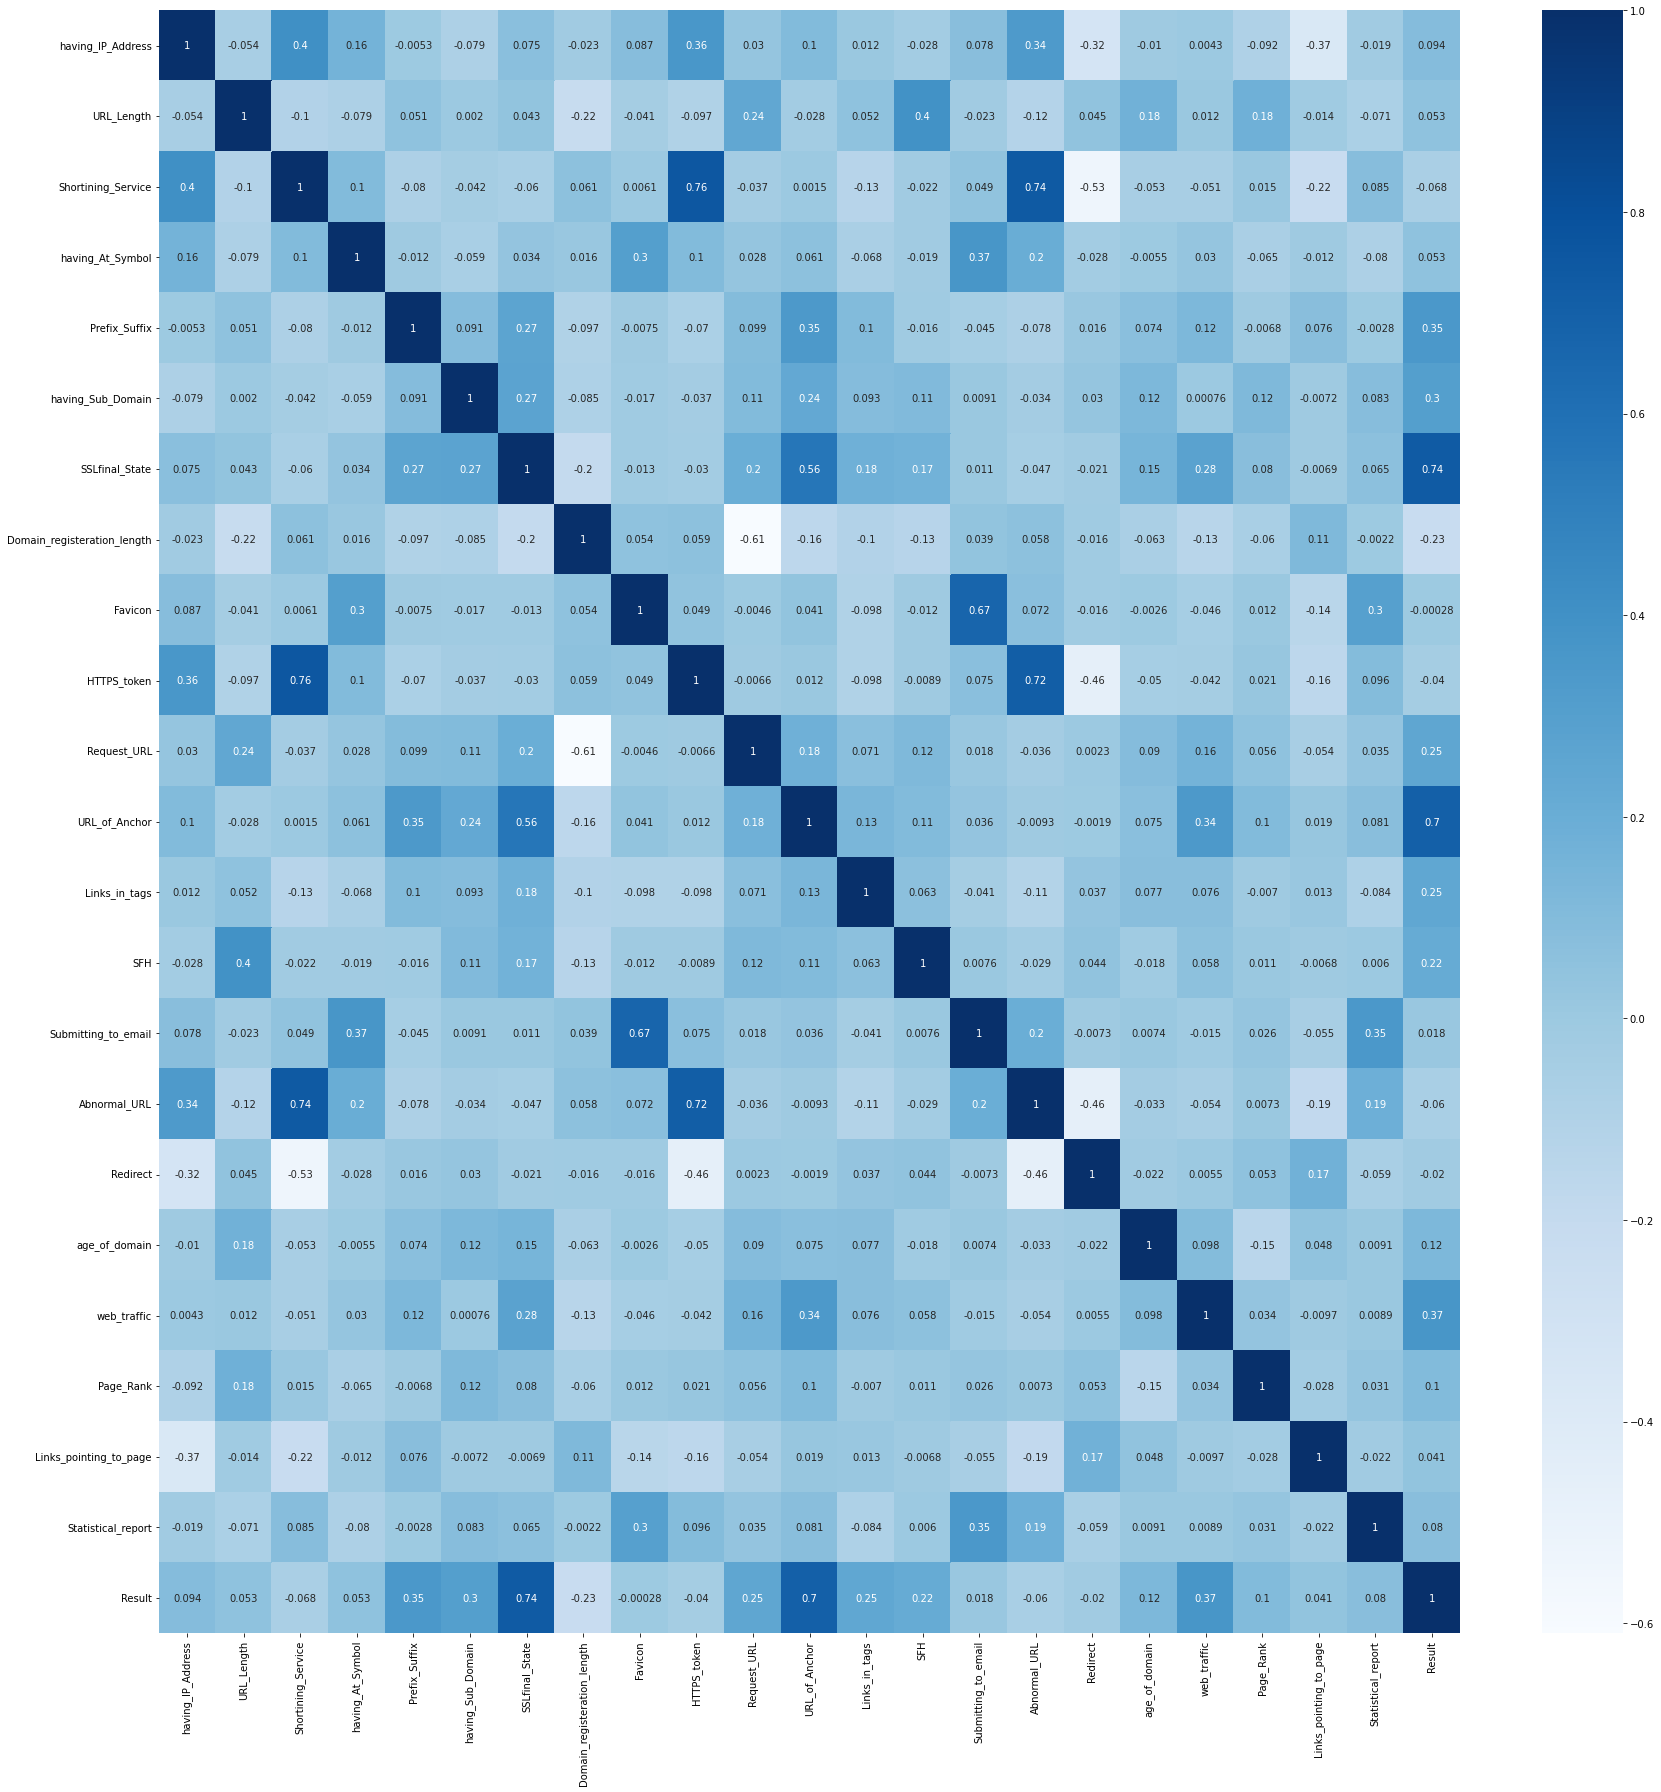

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(phi.corr(method='spearman'), cmap='Blues', annot=True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
targets = phi["Result"]
rep = {'1': 1, '-1': 0}
phi.drop(columns=['Result'], inplace=True)
phi.reset_index(drop=True, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(phi,targets,test_size = 0.25, random_state =0 )

In [ ]:
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10, )
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf, scoring="f1")
    return results


xgb = skfold(x_train, y_train, xgboost.XGBClassifier())
gnb = skfold(x_train, y_train, GaussianNB())
rf = skfold(x_train, y_train, RandomForestClassifier())
svc = skfold(x_train, y_train, SVC())
ada = skfold(x_train, y_train, AdaBoostClassifier())
knn = skfold(x_train, y_train, KNeighborsClassifier())
MLPc = skfold(x_train, y_train, MLPClassifier())
dic = {'XGB': xgb, 'RandomForest': rf, 'SVC': svc,
       'GaussianNB': gnb, 'adaBoost': ada, 'KNN': knn, 'MLPc': MLPc}

In [ ]:
def print_acc(results, model):
    print("F1 score of {} is {} and std is {}" .format(
        model, results.mean()*100, results.std()*100))


print_acc(xgb, 'XGBOOST')
print_acc(rf, 'Random Forest')
print_acc(svc, 'SVC ')
print_acc(gnb, 'gnb ')
print_acc(ada, 'adab ')
print_acc(knn, 'knn ')
print_acc(MLPc, 'mlp ')

F1 score of XGBOOST is 94.87053370553744 and std is 0.6693588424518264
F1 score of Random Forest is 97.21625340606937 and std is 0.6114792207097796
F1 score of SVC  is 94.98394197659262 and std is 0.5012549397097744
F1 score of gnb  is 44.18578156336614 and std is 2.0092061014863836
F1 score of adab  is 93.8845862079306 and std is 0.4911260615283625
F1 score of knn  is 94.76863820135735 and std is 0.6427729536522797
F1 score of mlp  is 96.6274673404156 and std is 0.6787612561786524


In [ ]:
results = pd.DataFrame(dic).applymap(lambda x: x*100)
results

,XGB,RandomForest,SVC,GaussianNB,adaBoost,KNN,MLPc
0,94.860814,97.849462,94.179894,45.771144,93.903743,95.145631,97.204301
1,94.580234,97.534834,94.994675,44.000000,93.829787,94.331551,96.145610
2,95.708155,97.326203,95.410886,41.908007,94.206009,96.248660,97.093649
3,94.192186,97.424893,94.438615,46.611570,93.023256,94.142705,96.746204
4,95.147679,96.602972,95.047418,45.333333,94.204426,94.951665,97.002141
5,96.092925,97.976571,95.560254,44.556114,94.264859,95.095949,97.136797
6,95.440085,97.326203,95.642933,41.496599,94.692144,94.347826,96.559140
7,94.041170,97.308934,95.114007,46.611570,93.662728,94.748124,96.061269
8,94.167550,95.737705,94.243070,44.816054,93.955461,93.824485,95.010846
9,94.474540,97.074756,95.207668,40.753425,93.103448,94.849785,97.314715


Text(0, 0.5, '%accuracy')

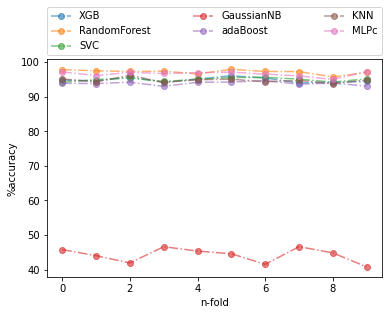

In [ ]:
ax = results.plot(**{'linewidth': 1.5, 'linestyle': '-.', 'marker': 'o',
                     'alpha': .6})
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
          mode="expand", borderaxespad=0, ncol=3)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(phi)
sel.transform(phi)

array([[-1,  1,  1, ..., -1,  1, -1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  0,  1, ..., -1,  0, -1],
       ...,
       [ 1, -1,  1, ..., -1,  0,  1],
       [-1, -1,  1, ..., -1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [ ]:
#m = RFECV(RandomForestClassifier(), scoring='accuracy')
#phi, y = load_iris(return_X_y=True)
#sel = SelectKBest(chi2, k=2)
#sel.fit(phi, y)

In [ ]:
phi.shape

(11055, 22)

In [ ]:
phi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   Prefix_Suffix                11055 non-null  int64
 5   having_Sub_Domain            11055 non-null  int64
 6   SSLfinal_State               11055 non-null  int64
 7   Domain_registeration_length  11055 non-null  int64
 8   Favicon                      11055 non-null  int64
 9   HTTPS_token                  11055 non-null  int64
 10  Request_URL                  11055 non-null  int64
 11  URL_of_Anchor                11055 non-null  int64
 12  Links_in_tags                11055 non-null  int64
 13  SFH                          11055 non-null  i

In [ ]:
from sklearn import datasets
#phi.Result.value_counts()

Save
using joblib </br>
PLease read the documentation.

## MAKE MODEL BEFORE SAVING
those (rf..) etc are arrays not classifiers

In [ ]:
# make random forest classifier
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(phi, targets, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)



RandomForestRegressor(n_estimators=1000, random_state=42)

Now RF is a classifier.
kindly read the documetation!

In [ ]:
# import joblib
# # save
# namee='Model.sav'
# joblib.dump(rf,namee)

In [ ]:
rf.score(test_features,test_labels)

0.8923798023633387

In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred_test = rf.predict(test_features)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(test_labels, np.round(abs(y_pred_test)), normalize=False)

2659

In [ ]:
confusion_matrix(y_test,np.round(abs(y_pred_test)))

array([[544, 705],
       [614, 901]])